In [8]:
using LinearAlgebra, Plots, PlotThemes, LaTeXStrings, SpecialFunctions; theme(:dao)
Γ = gamma


ħ = 1;
m = 1;

# nPts=30000;
nPts=20000;
L = 60;
Δx = L/(nPts-1);
# β = 0.2
# β = 0.25
β = 1.0
k=0
# k = 10/β
x=collect((-L/2):Δx:(L/2));
∇² =Δx^(-2)*SymTridiagonal(-2ones(nPts),ones(nPts-1));
V(β) = Diagonal(k .* (abs.(x)).^ β);
H(β) = (-ħ^2/(2m))∇² + V(β)

H (generic function with 1 method)

In [9]:
WKBℰ(k,ħ,m,β) = n -> (sqrt(π/8)* (ħ * k^(1/β)/sqrt(m)) * (2n+1) * Γ(3/2+1/β)/Γ(1+1/β))^(β/(1+β/2))
WKBℰ(β) = WKBℰ(k,ħ,m,β)

# nPlt = (Int64∘floor)(40abs(log10(1/4)))
# nPlt = 50
nPlt = 100
approxℰs = eigvals(H(β))[1:nPlt];
WKBℰs = WKBℰ(β).(0:nPlt-1);

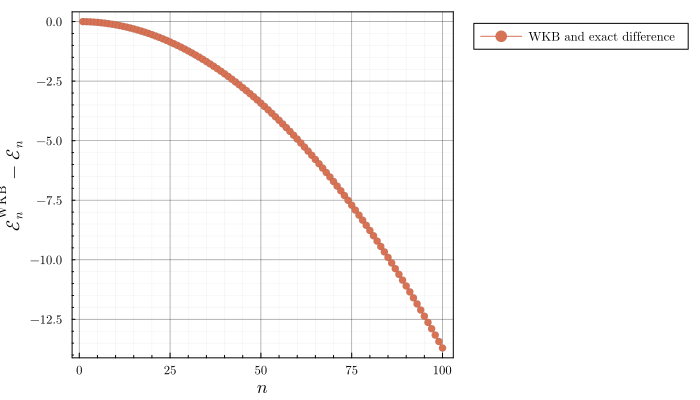

In [10]:
plot(WKBℰs-approxℰs,marker=:circle,label="WKB and exact difference",xlabel=L"n",ylabel=L"\mathcal{E}_n^{\mathrm{WKB}}-\mathcal{E}_n",size=(700,400))

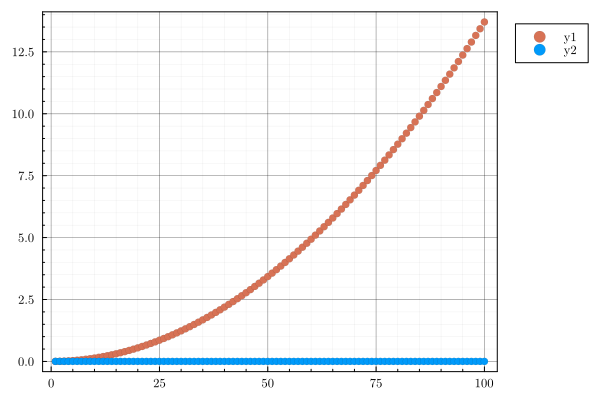

In [11]:
scatter(approxℰs)
scatter!(WKBℰs)
# ℰ(1).(0:(nPts-1))[1:30]

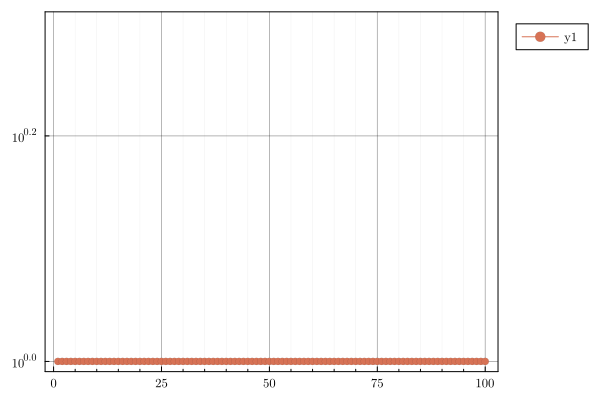

In [12]:
plot(abs.(approxℰs-WKBℰs)./approxℰs,yscale=:log10,marker=:circle)
# plot(abs.(approxℰs-WKBℰs)./approxℰs,marker=:circle)
